<a href="https://colab.research.google.com/github/gabrielmelendez779/deep_learning_cognitiveai/blob/main/Gradient_descent_op.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## this is based on kaggle notebook it a mere copy with some coment
## view in https://www.kaggle.com/matthewmrpyton/gradient-descent-optimization-with-tensorflow-2

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def func(x, y):
    return - 5.5 * tf.exp(- 20.0 * (x - 0.3)**2 - 40.0 * (y - 0.3)**2) - 3.5 * tf.exp(- 15.0 * (x - 0.6)**2 - 10.0 * (y - 0.85)**2) - 2.0 * tf.sin(2.0 * (x - y))

In [3]:
## so if you have some memory from a course of calculus you shoul aply a function over some x set and then you have a y set equals to f(x)
## ok lets do this
x = np.linspace(0, 1, 400)
X, Y = np.meshgrid(x, x)
Z = func(X, Y)

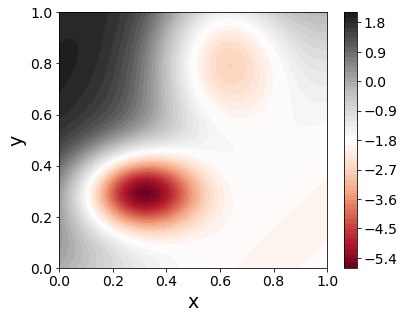

In [4]:

plt.figure(figsize=(6, 4.7))
plt.contourf(X, Y, Z, 60, cmap='RdGy')
plt.xlabel('x', fontsize=19)
plt.ylabel('y', fontsize=19)
plt.tick_params(axis='both', which='major', labelsize=14)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14) 

Ok we have a pretty nice plot of the contour in the space x y,f(x,y)
then we need to set a function for optimize over that space folowing the contour with some gradient logic a la Newton.


In [5]:
def constr(a, b):
    assert b > a
    return lambda x: tf.clip_by_value(x, a, b)


x = tf.Variable(0.0, trainable=True, dtype=tf.float64, name='x', constraint=constr(0, 1))
y = tf.Variable(0.0, trainable=True, dtype=tf.float64, name='y', constraint=constr(0, 1))


def objective():
    return - 5.5 * tf.exp(- 20.0 * (x - 0.3)**2 - 40.0 * (y - 0.3)**2) - 3.5 * tf.exp(- 15.0 * (x - 0.6)**2 - 10.0 * (y - 0.85)**2) - 2.0 * tf.sin(2.0 * (x - y))


def optimize(start, verbose=False, method='SGD'):
    x.assign(start[0])
    y.assign(start[1])

    if method == 'SGD':
        opt = tf.keras.optimizers.SGD(learning_rate=0.01)
 
    if method == 'ADAM':
        opt = tf.keras.optimizers.Adam(
            learning_rate=0.1,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            amsgrad=False,
        )

    obj_vals = []
    coords = []

    for i in range(50):
        if verbose and i % 5 == 0:
            print(f'step: {i}, obj = {objective().numpy():.4f}, x = {x.numpy():.4f}, y = {y.numpy():.4f}')
        obj_vals.append(objective().numpy())
        coords.append((x.numpy(), y.numpy()))
        opt.minimize(objective, var_list=[x, y])
        
    return obj_vals, coords

In [6]:
def plot_res(obj_vals, coords):
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    plt.contourf(X, Y, Z, 60, cmap='RdGy')
    plt.xlabel('x', fontsize=19)
    plt.ylabel('y', fontsize=19)
    plt.tick_params(axis='both', which='major', labelsize=14)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=14) 

    xcoord = [x[0] for x in coords]
    ycoord = [x[1] for x in coords]
    plt.plot(xcoord, ycoord, '.-')
    plt.plot(xcoord[-1], ycoord[-1], "y*", markersize=12)

    plt.subplot(122)
    plt.plot(obj_vals, '.-')
    plt.plot([len(obj_vals) - 1], obj_vals[-1], "y*", markersize=12)
    plt.xlabel('Step', fontsize=17)
    plt.ylabel('Objective', fontsize=17)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

step: 0, obj = 1.0222, x = 0.2500, y = 0.6500
step: 5, obj = -2.2770, x = 0.6280, y = 0.6581
step: 10, obj = -2.7049, x = 0.6392, y = 0.7882
step: 15, obj = -2.7054, x = 0.6384, y = 0.7924
step: 20, obj = -2.7054, x = 0.6384, y = 0.7924
step: 25, obj = -2.7054, x = 0.6384, y = 0.7924
step: 30, obj = -2.7054, x = 0.6384, y = 0.7924
step: 35, obj = -2.7054, x = 0.6384, y = 0.7924
step: 40, obj = -2.7054, x = 0.6384, y = 0.7924
step: 45, obj = -2.7054, x = 0.6384, y = 0.7924


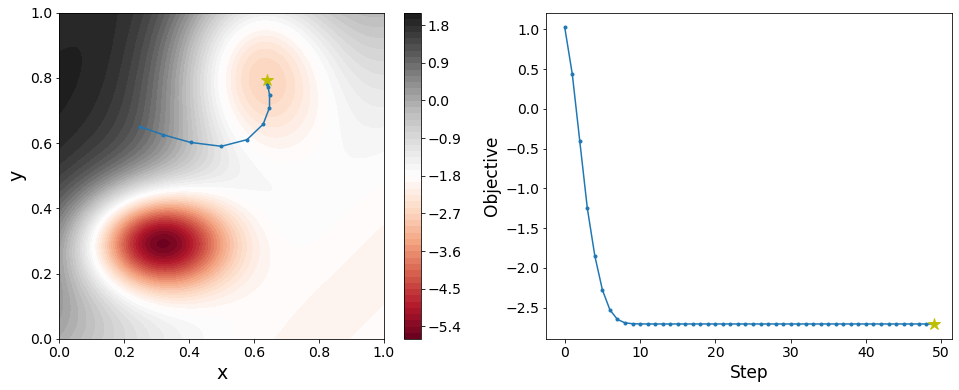

In [7]:
obj_vals, coords = optimize([0.25, 0.65], verbose=True, method='SGD')
plot_res(obj_vals, coords)

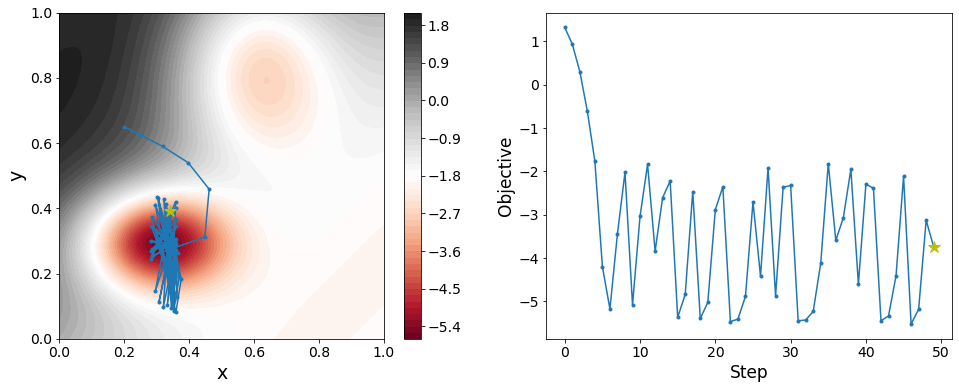

In [8]:
obj_vals, coords = optimize([0.2, 0.65], method='SGD')  
plot_res(obj_vals, coords)

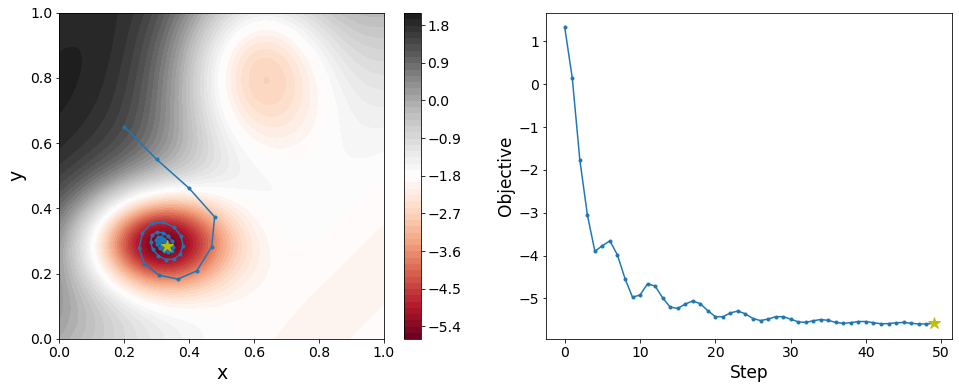

In [9]:
obj_vals, coords = optimize([0.2, 0.65], method='ADAM')  
plot_res(obj_vals, coords)

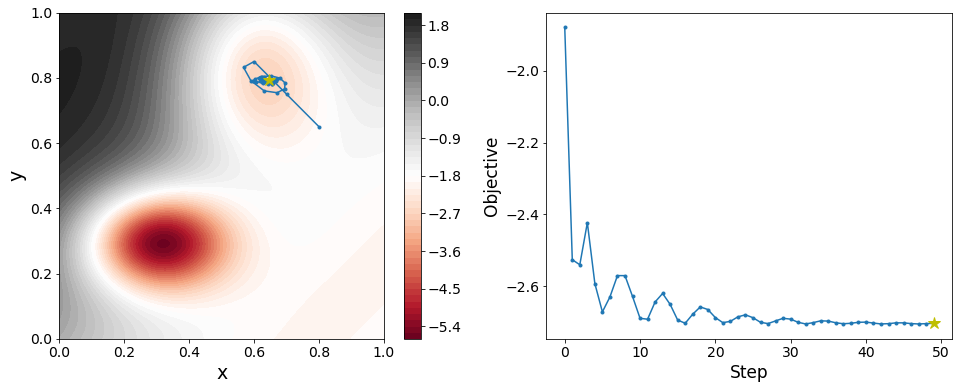

In [10]:
obj_vals, coords = optimize([0.8, 0.65], method='ADAM')  
plot_res(obj_vals, coords)

As we look, the behavior of the sgd and adam, performs better than gradient descent as traditional way 

In [11]:
x.assign(0.25)
y.assign(0.65)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

for i in range(30):
    with tf.GradientTape() as tape:
        z = func(x, y)
    grads = tape.gradient(z, [x, y])
    processed_grads = [g for g in grads]
    grads_and_vars = zip(processed_grads, [x, y])
    if i % 5 == 0:
        print(f"step {i}, z = {z.numpy():.2f}, x = {x.numpy():.2f}, y = {y.numpy():.2f},  grads0 = {grads[0].numpy():.2f}, grads1 = {grads[1].numpy():.2f}")
    opt.apply_gradients(grads_and_vars)

step 0, z = 1.02, x = 0.25, y = 0.65,  grads0 = -6.79, grads1 = 2.38
step 5, z = -2.28, x = 0.63, y = 0.66,  grads0 = -1.93, grads1 = -5.08
step 10, z = -2.70, x = 0.64, y = 0.79,  grads0 = 0.05, grads1 = -0.25
step 15, z = -2.71, x = 0.64, y = 0.79,  grads0 = 0.00, grads1 = -0.00
step 20, z = -2.71, x = 0.64, y = 0.79,  grads0 = 0.00, grads1 = -0.00
step 25, z = -2.71, x = 0.64, y = 0.79,  grads0 = 0.00, grads1 = -0.00
